# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**
- No. The Smartcab is not moving at all.
- Although the smartcab is not moving at all, it sometimes receives positive rewards, sometimes receives negative rewards. 
- Based on observation, when the light is red, the reward is positive (waiting for red light). When the light is green, the reward is negative (idling at green light).

**Extra Answer:**
- Agent in Reinforcement learning is something that take observation from environment (in real word, usually from sensor), then make a decision about what to do next.
- agent.py code is implement the methods for agent. Initially, the agent is doing nothing. For later improvement, the agent should take input from environment and inform the next action. The agent should also be learning and making better and better decision as time goes by.
- environment.py mainly descibe the "rules" the agent should follow by providing positive or negative rewards according to agent's reaction. environment.py also acts like a sensor for agent. 

> The reward is implemented in a complicated but reasonable way. 1) initially there is a random number [-1, 1] added to the rewards. 
```python
# First initialize reward uniformly random from [-1, 1]
        reward = 2 * random.random() - 1
```

> 2) if no traffic violation, then if the cab is going towards the destination, reward = 2. if traffic is red and the cab has to wait, then if the cab is waiting, reward = 2. If there is no violation according to the traffic rule, but the cab is not going to the destination, reward = 1. 
```python
if action == agent.get_next_waypoint(): # Was it the correct action?
                reward += 2 - penalty # (2, 1)
            elif action == None and light != 'green': # Was the agent stuck at a red light?
                reward += 2 - penalty # (2, 1)
            else: # Valid but incorrect
                reward += 1 - penalty # (1, 0)
```

> 3) if there is traffic violation, according to the violation severity, reward is various negative numbers. 
```python
            if violation == 1: # Minor violation
                reward += -5
            elif violation == 2: # Major violation
                reward += -10
            elif violation == 3: # Minor accident
                reward += -20
            elif violation == 4: # Major accident
                reward += -40
```

>4) If the deadline is enforce, as the time goes by, the penalty (negative reward) increase.

```python
        # No penalty given to an agent that has no enforced deadline
        penalty = 0

        # If the deadline is enforced, give a penalty based on time remaining
        if self.enforce_deadline:
            penalty = (math.pow(gradient, fnc) - 1) / (gradient - 1)
```

- planner.py basically get the current location of the smartcab and the destination location, then suggest the "fastest" way to get to the destination, without considering the traffic and traffic light.
- simulation.py is running the smartcab and provide output and GUI.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**
- In *Environment()*, **grid_size:** is the size of the street and bluiding blocks in simulation. In *env.create_agent()*, **learning** is false meaning the agent is behaving purely randomly; true means it is learning. **epsilong** parameter large meaning the agent is prone to doing random action (learning) even there is Q table; small means it is strictly obeying the Q table. **alpha**, learning rate decides how much the Q table is updated, alpha=0 means not updating at all, alpha =1 means only use the most current rewards to update Q table. In *env.set_primary_agent*, **enforce_deadline** decides wether there is penalty not to get to the destination before the deadline, otherwise, the cab will only be trained to drive safely. In *Simulator*, **update_delay**, **display**, **log_metrics**, **optimized** controls the output or display parameters. In *sim.run*, **tolerance** is the threshold of epsilon value for triggering testing (minimum number of training is 20 in this code), **n_test** decides how many tests to run after training.
-  act()
- render_text() is non-GUI render display, only outputs texts to the terminal. render()  is GUI render display
- East-West frist.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!


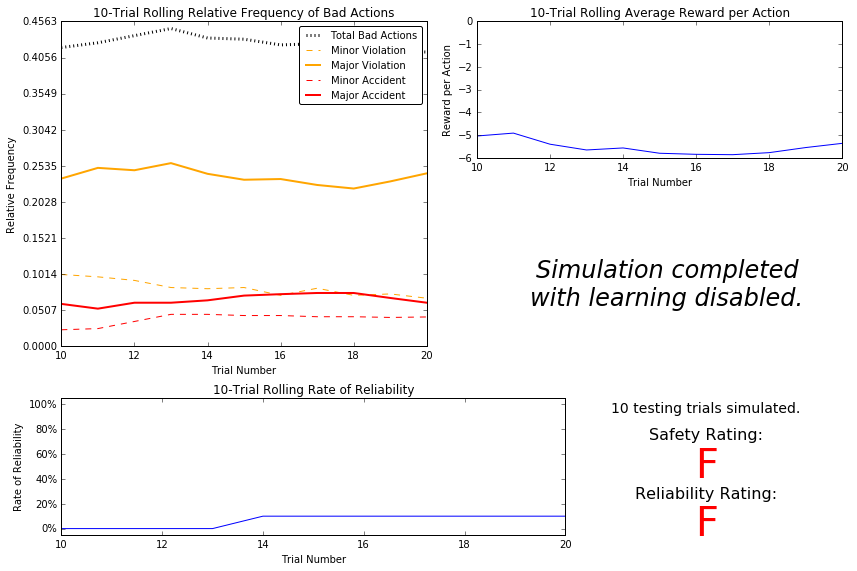

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**
- Total bad actions rate is around 42%. Some cause minor accidents. Some cause major accidents. See the figures above.
- The reliability rate is almost 0%. Oscasionally, the cab made to the destination before the deadline, which should be totally by accident. Since the agent is driving randomly, even reaching the destination will win more reward, the cab is not reacting rationally to reach the destinity in time. So the 0% relibility rate makes sense. 
- Major violations and accidents were penalized more heavily. On average, It is not penalized heavily, like minor violation.
- Since agent is driving randomly, the outcome won't change significantly.
- It is not Safe and not Reliable. Because the testing trails rate scores, F for safety and F for realiabity, is terrible. This means that the cab is making lots of traffic violations (not safe), and not reach the destination on time (not reliable).

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**

'waypoint' and 'inputs' features are most relevant for learning both safety and efficiency. 'waypoint' determines what the cab should do (to get to the deadline in time, for efficiency). And 'inputs' determines what it can do (to obey the traffic rules, for safety). 'deadline'  is relevant to efficiency rather than safety. 

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

**Initial thoughts:** if we choose 'waypoint' and 'inputs' features to build the states, then the states will be 
>[waypoint, traffic_light, left_traffic, right_traffic, oncoming_traffic]

This state space will be **huge**! 'waypoint' has 3 values (forward, left, right); traffic_light has 2 values (red, green); left_traffic, right_traffic, oncoming_traffic all have 4 values (None, left, forward, right). So in total, there are $3*2*4*4*4=384$ states! Considering the there are usually about 30 steps before the deadline, it is impossible to learn how to behave in every state!

**Now let's see how we can reduce the number of total states!**

**Second thoughts:** Why is'right_traffic' important? Do we ever pay attention to the traffic on the right when we have the right-of-way while driving? (Yes, we did, but only assuming other human drivers may take stupid actions!) Removing 'right_traffic' can reduce the state space from 384 to 96.
>[waypoint, traffic_light, left_traffic, oncoming_traffic]

**Third thoughts:** In my testing, I first thought 96 states are good enough. However, the testing scores are terrible. Let's think more carefully! If we are going to turn left on green light, we need to know the oncoming_traffic (going right or forward), we don't care about the left_traffic at all, and we don't care if the oncoming_traffic is turning left. After some summarization work, my state space is reduced to 8, which is small enough for the agent to learn:
> ('left', 'green', None, 'oncoming')
> ('right', 'red', None, None)
> ('right', 'red', 'left', None)
> ('right', 'green', None, None)
> ('forward', 'red', None, None)
> ('left', 'red', None, None)
> ('left', 'green', None, None)
> ('forward', 'green', None, None)
>

**Extra thoughts:** The state space could even be reduced to 7, without affect agent's action. When the traffic light is red, and we should turn left or go forward, the best action should be None. However, this improvement is not significantly enough. So I will keep 8 states for Q learning.
> ('left', 'green', None, 'oncoming')
> ('right', 'red', None, None)
> ('right', 'red', 'left', None)
> ('right', 'green', None, None)
> ('forward_or_left', 'red', None, None)
> ('left', 'green', None, None)
> ('forward', 'green', None, None)

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

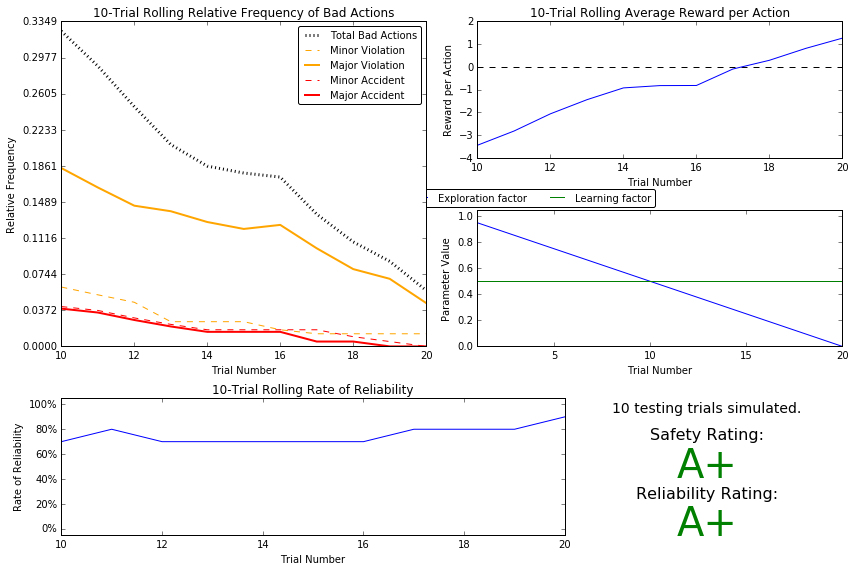

In [3]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

Both the Safety Rating and the Reliability Rating are **A+**! Great!
- Only in the early training stage, the averaged rewards and the bad actions are similar to the *basic driving agent* (random driving). With Q-Learning, the agent is learning and improving very fast.
- About 20. The initial $\epsilon$ value is 1. It linearly reduce at rate of 0.05 per training. In total, the number of training trails should be 20.
- Yes, the parameter panel for $\epsilon$ looks correct.
- Yes, exactly! This is the meaning and purpos of Learning!
- Safety Rating and the Reliability Rating were both **F** for the *basic driving agent*. Now these ratings are both **A+**!

**Extra:**

The learning rule for Q table is:
$$
Q(s,action) <= (1- \alpha)\times Q(s,action) + \alpha\times Reward
$$

The $\epsilon$-greedy learning method is implemented as:
```python
        # When not learning, choose a random action
        if self.learning == False:
            action=random.choice(self.valid_actions)
        else:
        # When learning:
            # When a randomly generated number is smaller than current epsilon, 
            # choose a random action (Exploring)
            if random.random() < self.epsilon:
                action=random.choice(self.valid_actions)
            # Otherwise, strictly follow the Q table by choosing the action with the highest Q sore
            # (follow what has been learned)
            else:
                action, _ = self.get_maxQ(state)
```

**Extra Extra:**

My Final Q-table is (looks very reasonable):
```
/-----------------------------------------
| State-action rewards from Q-Learning
\-----------------------------------------
('left', 'green', None, 'oncoming')
 -- forward : 0.00
 -- None : -2.07
 -- right : 0.43
 -- left : 0.00
('right', 'red', None, None)
 -- forward : -5.14
 -- None : 0.93
 -- right : 2.01
 -- left : -8.80
('right', 'red', 'left', None)
 -- forward : 0.00
 -- None : 1.82
 -- right : -9.91
 -- left : -10.89
('right', 'green', None, None)
 -- forward : 1.27
 -- None : -4.18
 -- right : 2.51
 -- left : 0.78
('left', 'red', None, None)
 -- forward : -25.41
 -- None : 1.60
 -- right : 1.16
 -- left : -16.19
('forward', 'red', None, None)
 -- forward : -10.28
 -- None : 1.39
 -- right : 0.66
 -- left : -10.16
('left', 'green', None, None)
 -- forward : 0.66
 -- None : -4.75
 -- right : 0.83
 -- left : 2.19
('forward', 'green', None, None)
 -- forward : 2.12
 -- None : -3.44
 -- right : 0.06
 -- left : -10.19
 ```

** Response to Reviewer: **

In the last review, the reviewer said that "The simplify_state function is not allowed for this project although I have to say I like it, the problem is that it circumvents the premise of the project which is for the model to learn the traffic rules you just defined". 

Actually, it took me quite some effort (and inspiration) to come up with the idea to simplify the total 96 states to 8 states. The 96 states is already excluding the right traffic. However, they are still too many for the agent to learn the correct behavior. 

Below, I show the simulation without "simplify_state()" function. And I set a slower linear decay function:
$$ \epsilon_{t+1} = \epsilon_{t} - 0.02, \hspace{10px}\textrm{for trial number } t$$
which means that it will take 50 training trails. 

However, the testing result is not as good as before, when I was using only 8 states for the agent to learn. Again, the Q-table shows that there are lots of states where the agent did not learn at all (Q values are 0.0). 

That is why I was thinking about how to make the agent learn efficiently, with the minimum amount of information to make the correct decision. From testing, I think the "simplify_state()" function is an ideal solution.


The Q table has 96 entries. Here only the first 8 entries are shown:
```
/-----------------------------------------
| State-action rewards from Q-Learning
\-----------------------------------------
('left', 'green', 'forward', 'left') ## Wrong! cannot turn left, should go forward or turn right!
 -- forward : 0.00  ## Not learning!
 -- right : 0.00  ## Not learning!
 -- None : 0.15
 -- left : 1.14
('right', 'red', None, 'left')  ## Wrong! should stop!
 -- forward : -11.33
 -- right : 1.31
 -- None : 0.53
 -- left : -7.57
('forward', 'green', None, None)  ## Correct!
 -- forward : 0.75
 -- right : 0.31
 -- None : -4.93
 -- left : 0.80
('left', 'red', 'right', 'left')  ## Wrong! should stop!
 -- forward : 0.00  ## Not learning!
 -- right : 0.22
 -- None : 0.00  ## Not learning!
 -- left : -7.41
('right', 'green', 'forward', 'right')  ## Wrong! should turn right!
 -- forward : 0.94
 -- right : 0.00  ## Not learning!
 -- None : 0.00  ## Not learning!
 -- left : 0.00  ## Not learning!
('right', 'green', 'right', 'forward')  ## Wrong! should turn right!
 -- forward : 0.39
 -- right : 0.00  ## Not learning!
 -- None : 0.00  ## Not learning!
 -- left : 0.00  ## Not learning!
('left', 'red', 'right', 'right')  ## Correct!
 -- forward : 0.00  ## Not learning!
 -- right : 0.00  ## Not learning!
 -- None : 0.79
 -- left : 0.00  ## Not learning!
('left', 'green', 'right', 'right')  ## not wrong, but not learning. None has maximum Q value, 0.0.
 -- forward : 0.00  ## Not learning!
 -- right : 0.00  ## Not learning!
 -- None : 0.00  ## Not learning!
 -- left : -10.37
 ```


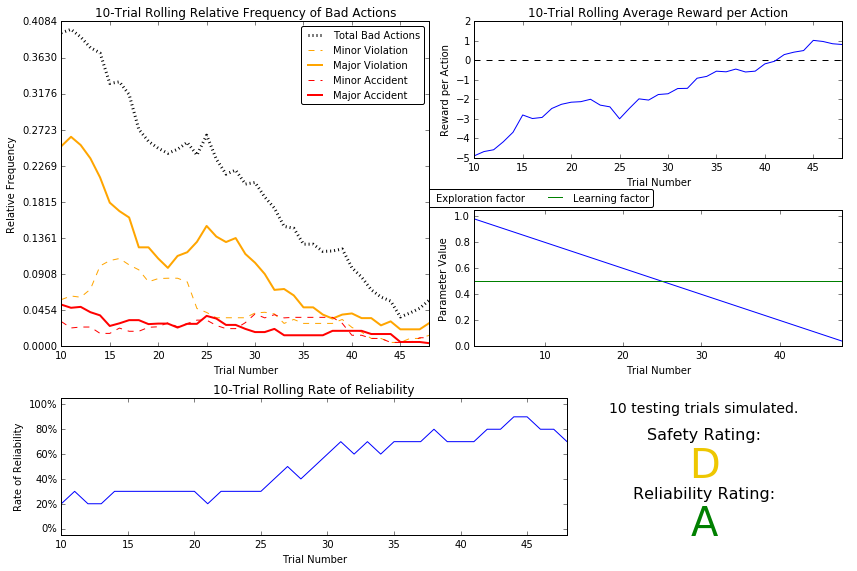

In [4]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning_96states.csv')

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

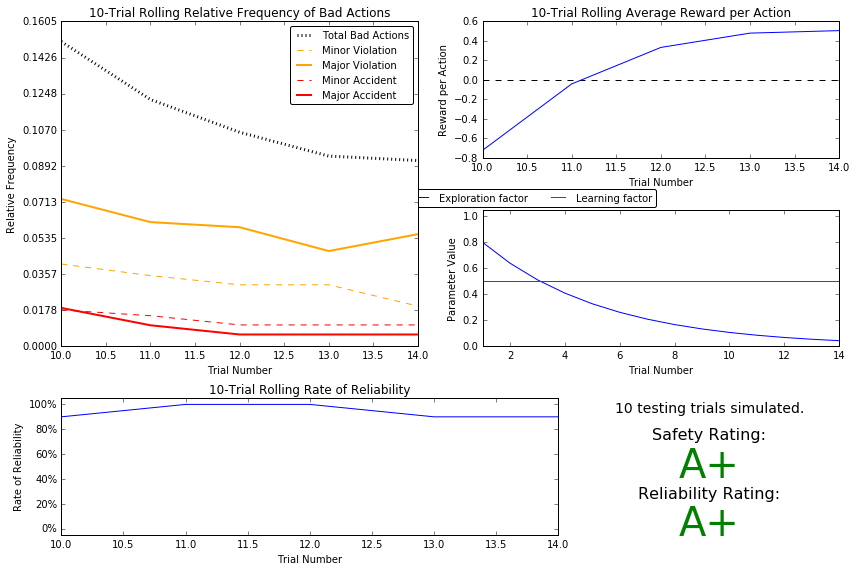

In [5]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**
- I am using the first decay equation, with $a=0.8$. I have tried all four decay equations for $\epsilon$. The third one is also a good decay equation (with $a=0.2$), very similar to the first one. The second one decay too fast (if we set $t=$ number of trails). The fourth one is terrible, which is not a monotonically dreasing decay funtion (cannot be called decay function).
- I have modified simulator.py to let the minimum number of training to be 10 (Sorry). Otherwise the minimum training trails are 20, my optimized Q-Learning is just as good as the default Q-Learning. With the new decay function, the agent learns faster. So the training can be finished in 14 trails and the testing result is also good.
- I leave the epsilong-tolerance value to be 0.05. Because the number of training trails also depend on the initial value of epsilon and how fast it decays (depend on the $a$ parameter in the first and third decay function). I have tried to set alpha to be constantly big, 0.8, or small, 0.2, which seems to give a worse result than alpha=0.5. I have also tried to make a decay function for alpha, which does not seem to improve much. So I guess alpha=0.5 is already a good number for Q-Learning, at least for our case.
- As I said, if the minimum training trails are 20, the default Q-Learing is already excellent. After I reduce the default training number to 10 and use a new decay equation for $\epsilon$, the agent is learning faster.
- Yes.
- Yes, I am satisfied! The Q table all looks reasonable. When I was driving, I probably couldn't do better.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 

After investigating the Q table from the improved Q-Learning after 14 training trails, I think it is qualified to be an optimal policy. And the default Q-Learning after 20 trainig trails is also an optimal policy, according to its Q table.

The states are:
(Next_movememnt, Traffic light, Status of left traffic, Status of right traffic)

In the Q table below, # shows my comments, which is to compare what I will do and what is the action indicated by the highest Q-value. I am happy to see that my agent made correct actions to all the states!

```
/-----------------------------------------
| State-action rewards from Q-Learning
\-----------------------------------------
('left', 'green', None, 'oncoming') # Correct action! Although in this state, the car can turn right too.
 -- forward : 0.49  
 -- right : 0.00
 -- None : -2.72
 -- left : 0.00
('forward', 'red', None, None) # Correct action! Stop is the best!
 -- forward : -9.15
 -- right : -2.49
 -- None : 1.54
 -- left : -12.61
('forward', 'green', None, None) # Correct action! Going forward is the best!
 -- forward : 1.87
 -- right : 0.69
 -- None : -4.92
 -- left : -1.67
('right', 'red', None, None) # Correct action! Turning right is the best!
 -- forward : -7.54
 -- right : 1.05
 -- None : 1.81
 -- left : -9.89
('right', 'green', None, None) # Correct action! Turning right is the best!
 -- forward : 0.75
 -- right : 2.05
 -- None : -4.03
 -- left : -0.27
('right', 'red', 'left', None) # Correct action! Stop is the best!
 -- forward : -20.07
 -- right : -8.98
 -- None : 0.87
 -- left : -22.69
('left', 'red', None, None) # Correct action! Stop is the best!
 -- forward : -8.40
 -- right : 0.29
 -- None : 1.62
 -- left : -19.91
('left', 'green', None, None) # Correct action! Turning left is the best!
 -- forward : 0.85
 -- right : 0.30
 -- None : -3.61
 -- left : 1.35
```

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

I really want to know the answer. I have been thinking and watch other online videos about Q-Learning. 

My tentative explanation is: The discount factor, $\gamma$, is used to discount future rewards. So if there is a big good reward at the end (usually at the destination), the agent would like to get it sooner than later, especially if the $\gamma$ is large. So imposing $\gamma$ will have similar effects to enforce the deadline by giving more penalty as time goes by. But for the smartcab problem, usually it is not the best to arrive at the destination as soon as possible. The rule is that there is a solid *deadline*, which means later than the deadline is not tolerated. $\gamma$ can not enforce the strict deadline.

On the other hand, each time the smartcab take an action at the crossing, if it make a good action, it get good rewards and vice versa. Each action is equally important (especially not make accidents), it should not be that the smartcab can make bad decision at the beginning, and try to get later rewards as soon as possible in order for remedy. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.